#### Sample subseries plot

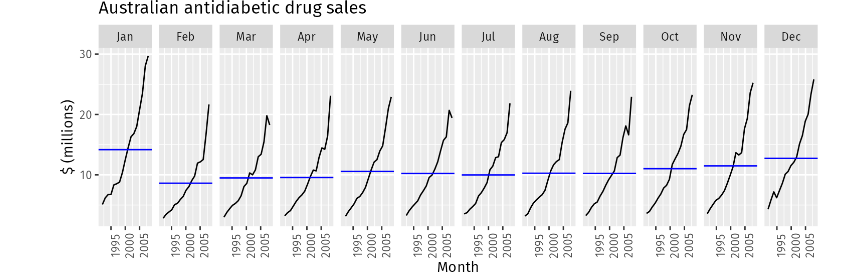

#### Sample subseries plot in pandas

In [ ]:
subseries_grid = sns.FacetGrid(aus_arrivals, row='Origin', col='Quarter', height=7, aspect=0.7)
subseries_grid.map(sns.lineplot, 'quarter_datetime', 'Arrivals')
subseries_grid.refline(y=aus_arrivals["Arrivals"].median())

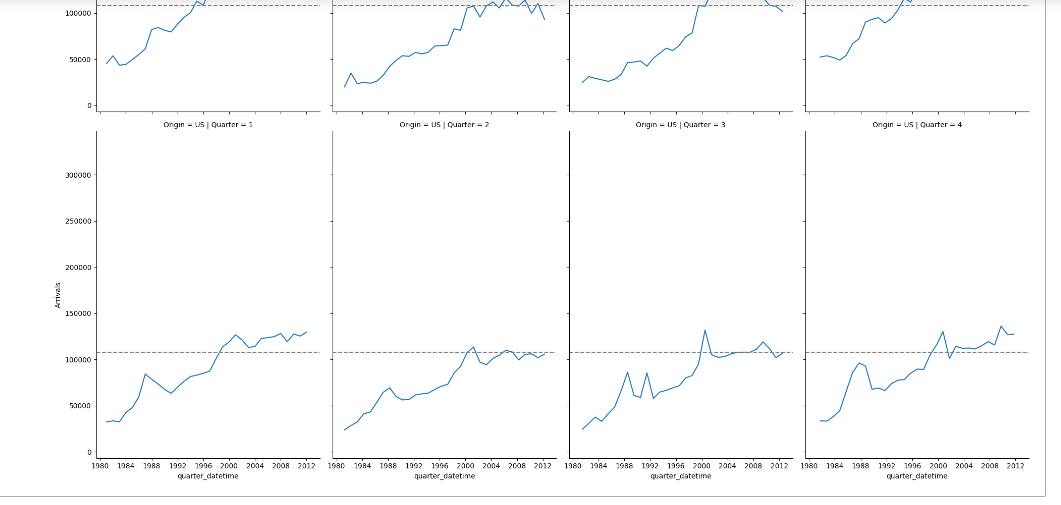

In [ ]:
# Code to get median for each subplot
# Subplot median will be created based on 'quarter' column here
# 'Bricks' is the column having numeric value of interest
for ax in temp_subseries.axes.flat:
    median_value = bricks_data[bricks_data['quarter'] == ax.get_title().split()[-1]].groupby('quarter')['Bricks'].median()
    ax.axhline(median_value.values[0], color='red', linestyle='--', label='Median')
plt.legend(loc='best')

#### Sample seasonal plot

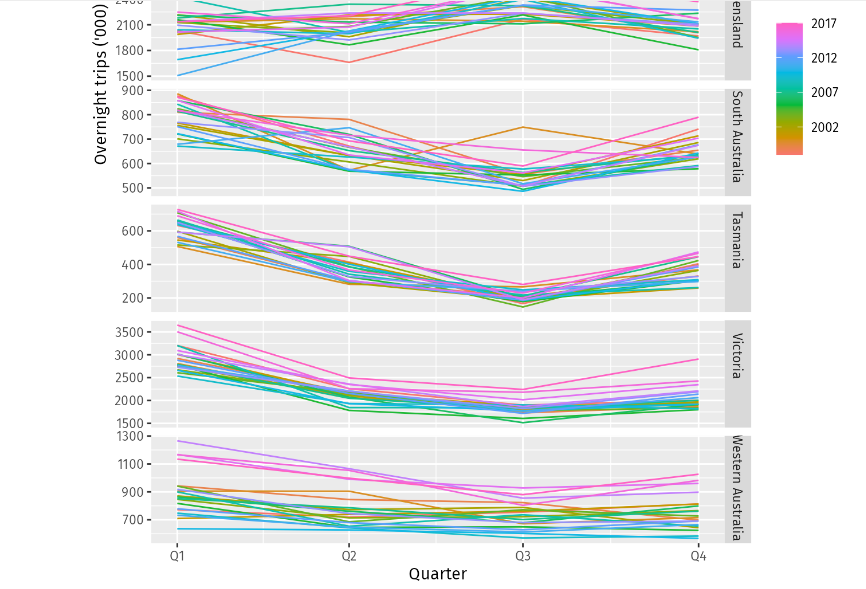

#### Sample seasonal plot in pandas

In [ ]:
g = sns.FacetGrid(aus_arrivals, row='Origin', hue='year')
g.map(sns.lineplot, 'Quarter', 'Arrivals').add_legend()

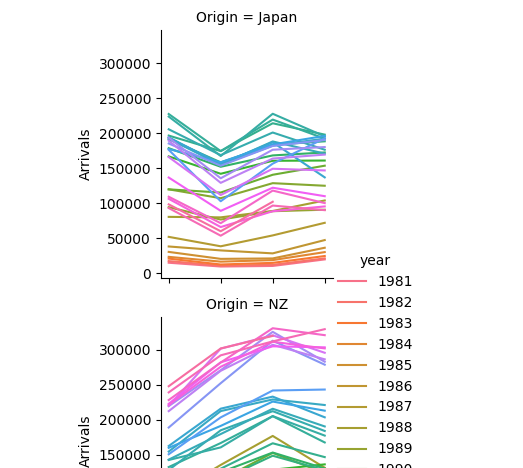

#### Lag plots

In [ ]:
import matplotlib.cm as cm

def create_lag_plots(dataframe, variable, groupby_col):
    
    # Create a 3x3 grid of lag plots
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))

    # Define a sequential color map
    cmap = cm.get_cmap('viridis', len(dataframe[variable].unique()))

    # Plot lag plots for lags 1 to 9
    for i in range(1, 10):
        row, col = divmod(i - 1, 3)  # Calculate the row and column for the subplot
        lag = dataframe[variable].shift(i)  # Create a lagged series
        df_lagged = pd.concat([dataframe[variable], lag, dataframe[groupby_col]], axis=1)
        df_lagged.columns = ['Original', f'Lag {i}', 'Category']

        # Plot the lag plot as a line plot with sequential colors in the specified subplot
        ax = axes[row, col]
        for category, data_category in df_lagged.groupby('Category'):
            color = cmap(dataframe[groupby_col].unique().tolist().index(category) / len(dataframe[groupby_col].unique()))
            data_category.plot(ax=ax, x='Original', y=f'Lag {i}', title=f'Lag {i}', label=f'Category {category}', color=color)
        ax.set_xlabel('Original')
        ax.set_ylabel(f'Lag {i}')
        ax.legend()

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

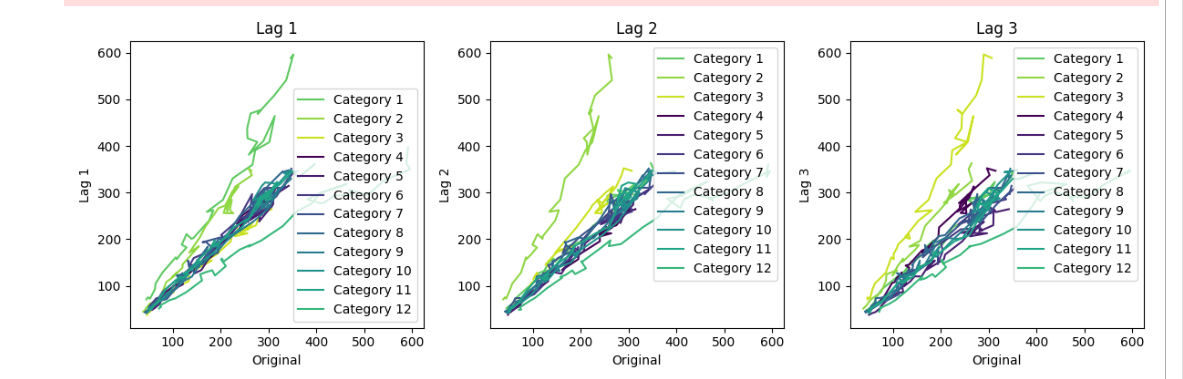

#### ACF plots

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
myseries_data_for_ACF = myseries[['Month', 'Turnover']]
myseries_data_for_ACF.set_index('Month', inplace=True)
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(myseries_data_for_ACF, lags=24, ax=ax);

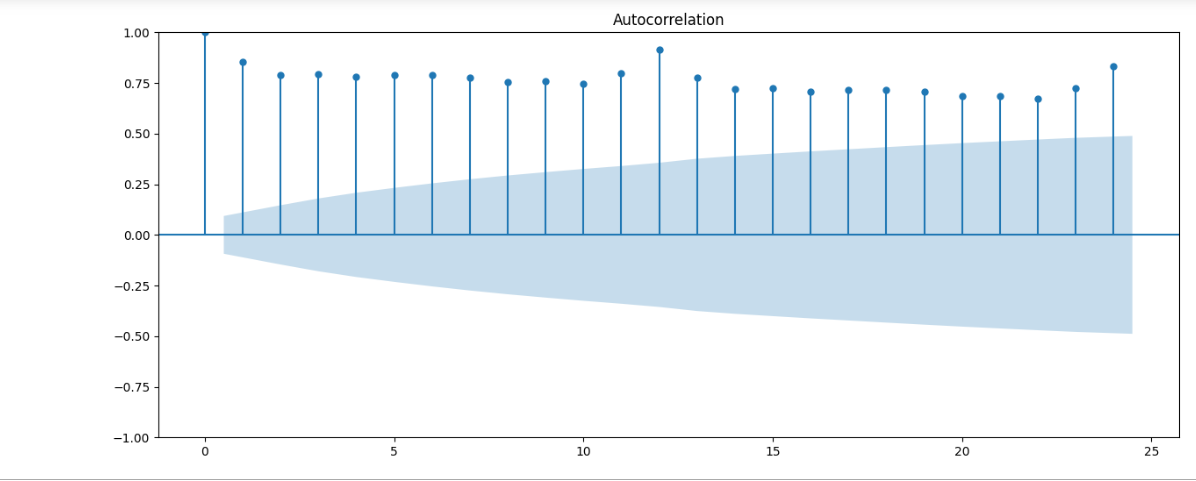

# Trend and Seasonality (ACF)

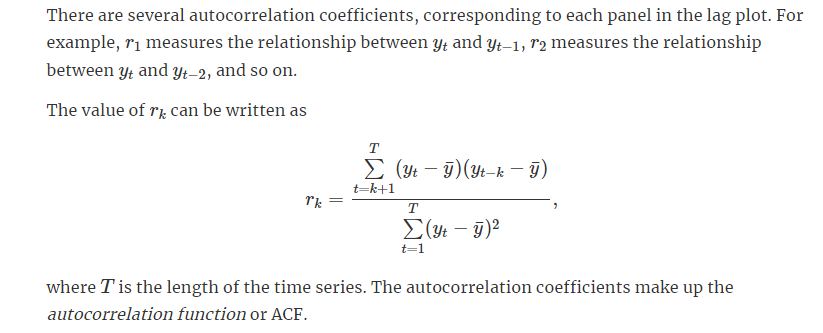

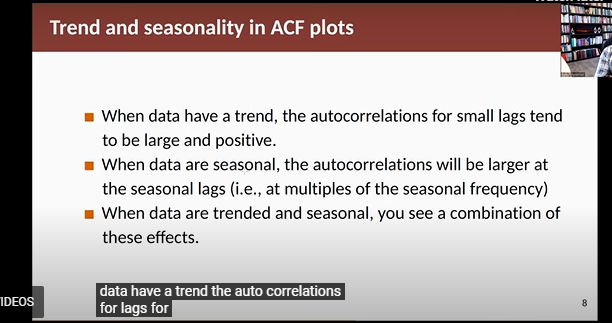

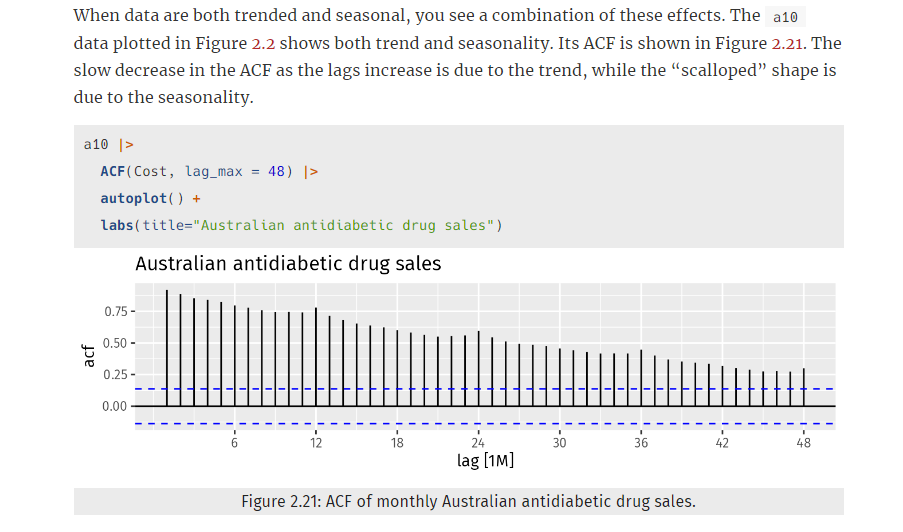

# White noise

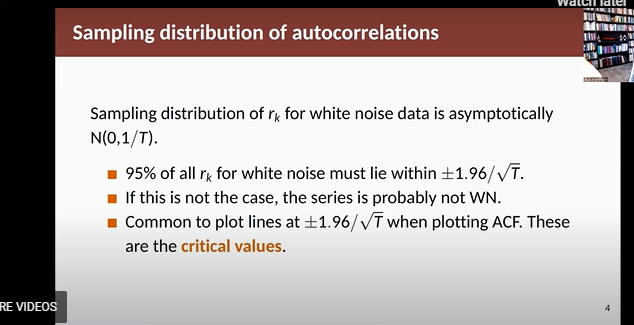